<a href="https://colab.research.google.com/github/serenechack/Remote-Sensing/blob/main/ProblemSet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Serene Joe
# ECE-471
# Homework 1

In [ ]:
# Task 1

In [ ]:
!rm -rf s2_santafe/

In [ ]:
!gdown https://drive.google.com/uc?id=1g0Pfz6ggXUhfrLYg2Tn8yI0dN_ZtP4Q0
!unzip -oq s2_santafe.zip

Downloading...
From: https://drive.google.com/uc?id=1g0Pfz6ggXUhfrLYg2Tn8yI0dN_ZtP4Q0
To: /content/s2_santafe.zip
100% 3.33G/3.33G [00:42<00:00, 78.4MB/s]


In [ ]:
file_list = !ls s2_santafe/

In [ ]:
file_list

['sentinel-2:L1C_2018-01-07.tif  sentinel-2:L1C_2018-07-18.tif',
 'sentinel-2:L1C_2018-01-12.tif  sentinel-2:L1C_2018-07-21.tif',
 'sentinel-2:L1C_2018-01-14.tif  sentinel-2:L1C_2018-07-23.tif',
 'sentinel-2:L1C_2018-01-27.tif  sentinel-2:L1C_2018-07-26.tif',
 'sentinel-2:L1C_2018-01-29.tif  sentinel-2:L1C_2018-07-28.tif',
 'sentinel-2:L1C_2018-02-08.tif  sentinel-2:L1C_2018-07-31.tif',
 'sentinel-2:L1C_2018-02-11.tif  sentinel-2:L1C_2018-08-02.tif',
 'sentinel-2:L1C_2018-02-13.tif  sentinel-2:L1C_2018-08-05.tif',
 'sentinel-2:L1C_2018-02-18.tif  sentinel-2:L1C_2018-08-07.tif',
 'sentinel-2:L1C_2018-02-21.tif  sentinel-2:L1C_2018-08-10.tif',
 'sentinel-2:L1C_2018-02-23.tif  sentinel-2:L1C_2018-08-12.tif',
 'sentinel-2:L1C_2018-02-28.tif  sentinel-2:L1C_2018-08-17.tif',
 'sentinel-2:L1C_2018-03-03.tif  sentinel-2:L1C_2018-08-20.tif',
 'sentinel-2:L1C_2018-03-10.tif  sentinel-2:L1C_2018-08-25.tif',
 'sentinel-2:L1C_2018-03-13.tif  sentinel-2:L1C_2018-08-27.tif',
 'sentinel-2:L1C_2018-03-

In [ ]:
def dateOrder(file_list):
  orderedList = []
  second_half = []

  for x in file_list:
    file_split = x.split()
    orderedList.append(file_split[0])

    second_half.append(file_split[1])

  orderedList.extend(second_half)

  return orderedList


In [ ]:
orderedList = dateOrder(file_list)

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject
from rasterio.crs import CRS
from rasterio.transform import from_origin
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
import re
import json
from numpy import array
import collections
import warnings

In [ ]:
# Task 1

In [ ]:
# Function to find where 2% - 98% of the data lies in
def find_clip(data):

  # Clipping the data to 2% - 98%
  hist, bin_edges = np.histogram(data, bins = 100)
  two_percent = sum(hist) * .02
  ninety_eight_percent = sum(hist) * .98
  cumulative_array = np.cumsum(hist)
  min_index = (np.abs(cumulative_array - two_percent)).argmin()
  max_index = (np.abs(cumulative_array - ninety_eight_percent)).argmin()
  min_val = bin_edges[min_index]
  max_val = bin_edges[max_index + 1]

  return min_val, max_val

In [ ]:
# Function to plot the raster files
def plot_raster(orderedList):
  for x in orderedList:

    if 'content/s2_santafe/' not in x:
      raster_file = '/content/s2_santafe/' + x
    else:
      raster_file = x

    # Getting the date

    c = x.split('_')
    d = c[1].split('.')
    date = d[0]

    src = rasterio.open(raster_file)
    arr = src.read()

    # Scaling the raster file so that the image we get back is nice

    red = arr[0, :, :]
    red_scaled = red
    red_min, red_max = find_clip(red)
    np.clip(red, red_min, red_max, out=red_scaled)
    red_int_scaled = (red_scaled - red_scaled.min()) / (red_scaled.max() - red_scaled.min()) * 255

    green = arr[1, :, :]
    green_scaled = green
    green_min, green_max = find_clip(green)
    np.clip(green, green_min, green_max, out=green_scaled)
    green_int_scaled = (green_scaled - green_scaled.min()) / (green_scaled.max() - green_scaled.min()) * 255

    blue = arr[2, :, :]
    blue_scaled = blue
    blue_min, blue_max = find_clip(blue)
    np.clip(blue, blue_min, blue_max, out=blue_scaled)
    blue_int_scaled = (blue_scaled - blue_scaled.min()) / (blue_scaled.max() - blue_scaled.min()) * 255

    nir = arr[3, :, :]
    nir_scaled = nir
    nir_min, nir_max = find_clip(nir)
    np.clip(nir, nir_min, nir_max, out=nir_scaled)
    nir_int_scaled = (nir_scaled - nir_scaled.min()) / (nir_scaled.max() - nir_scaled.min()) * 255

    rgb = np.stack([red_int_scaled, green_int_scaled, blue_int_scaled], axis=-1)
    ngb = np.stack([nir_int_scaled, red_int_scaled, green_int_scaled], axis=-1)

    # Plotting

    fig = plt.figure(dpi=150)
    ax1 = fig.add_subplot(2,2,1)
    ax1.set_title('RGB' + ' ' + date)
    ax1.imshow(rgb.astype('uint8'))



    ax2 = fig.add_subplot(2,2,2)
    ax2.set_title('Color Infrared' + ' ' + date)
    ax2.imshow(ngb.astype('uint8'))
    ax1.axis('off')
    ax2.axis('off')


In [ ]:
plot_raster(orderedList)

In [ ]:
plt.close('all')

In [ ]:
# Task 1 Notes

# Plotting the Data

# I went through a few iterations to open the GeoTIFF files. At first, I simply opened the file, and a blank image would appear, along with the
# warning that matplotlib clipped the input data to the valid range for imshow with RGB data ([0..1] for floats or [0...255] for integers)
# I noticed that in the profile of the raster file, the datatype was of uint16. Changing the data type of the red/green/blue/nir arrays to uint8
# got rid of the warning, but still didn't produce an image with any significant meaning. It looked more like splotches of color layered on top of each other.
# Looking more carefully at the error, and discussing during class hinted that there were additional scaling issues to be solved.
# The warning indicates that the data range of the image is not within the expected RGB data, which would be 0-255 for integers or 0-1 for floats.
# Since we are working with data in an integer format, we rescale the data to the range [0, 255], and change the datatype to uint8.
# However, the pictures were still very dark. After discussion with Professor Karra, we disucssed how min-max scaling may be causing the darkness
# of the images because we would be scaling to a min and a max that were outliers for the data set.
# Instead, I looked at the histogram of 2% - 98% of the data and chose the min and the max from that subset. Once I plotted, the images looked much brighter.

# Observing the data

# Once the pictures were bright enough to make meaningful analysis on, it was clear that the GeoTIFF files were depicting the same shot of Sante Fe, New Mexico
# over the course of one year. Right away, I noticed that much of the data was a bit blueish, while others were of the reddish hue that I mostly expected.
# I anticipate that this may cause some problems further.
# In addition, some of the imagaes are half darkened out, which is a little strange. Some of the images are also darker than others. And the
# image taken on 2018-12-30 is slightly grey, which I thought was a little bit strange.


In [ ]:
# Task 2

In [ ]:
# Function to get the CRS, spatial extent, and resolution for each file in the dataset
def get_info(orderedList):

  crs_list = []
  bounds_list = []
  resolution_list = []

  for x in orderedList:

    if 'content/s2_santafe/' not in x:
      raster_file = '/content/s2_santafe/' + x
    else:
      raster_file = x

    src = rasterio.open(raster_file)

    arr = src.crs
    crs_list.append(arr)

    arr = src.bounds
    bounds_list.append(arr)

    arr = src.res
    resolution_list.append(arr)

  return crs_list, bounds_list, resolution_list

In [ ]:
# Function to reporject the CRS to EPSG:32613
def changeCRS(orderedList):

  target_crs = CRS.from_epsg(32613)
  renamedOrderedList = []

  for x in orderedList:

    # Getting the source data and metadata
    raster_file = '/content/s2_santafe/' + x
    src = rasterio.open(raster_file)
    arr = src.read()
    src_transform = src.transform
    src_crs = src.crs
    src_width = src.width
    src_height = src.height

    # Calculating the target crs transform and height/wdith

    dst_transform, dst_width, dst_height = calculate_default_transform(
        src_crs, target_crs, src_width, src_height, *src.bounds
    )

   # Define the destination dataset options
    dst_options = src.meta.copy()
    dst_options.update({
        'crs': target_crs,
        'transform': dst_transform,
        'width': dst_width,
        'height': dst_height
    })

    # Create the destination raster file
    dst_path = '/content/s2_santafe/' + 'projected_'+ x
    with rasterio.open(dst_path, 'w', **dst_options) as dst:
      for i in range(1, src.count + 1):
        # Reproject the source data to the target CRS and write it to the destination
          reproject(
              source=rasterio.band(src, i),
              destination=rasterio.band(dst, i),
              src_transform=src_transform,
              src_crs=src_crs,
              dst_transform=dst_transform,
              dst_crs=target_crs,
              resampling=rasterio.enums.Resampling.nearest
          )

    renamedOrderedList.append(dst_path)

  return renamedOrderedList

In [ ]:
renamedOrderedList = changeCRS(orderedList)

In [ ]:
# Function to find the intersection of the spatial extent for each file in the dataset
def findIntersection(boundsList, resolution_list):
  left = []
  right = []
  bottom = []
  top = []
  res = max(resolution_list)

  for x in boundsList:
    left.append(x[0])
    bottom.append(x[1])
    right.append(x[2])
    top.append(x[3])
  return max(left), min(right), max(bottom), min(top), res

In [ ]:
crs_list, bounds_list, resolution_list = get_info(renamedOrderedList)
target_left, target_right, target_bottom, target_top, res = findIntersection(bounds_list, resolution_list)

In [ ]:
# Function to reproject each image in the dataset to the spatial extent intersection
def changeBoundsRes(changedCRSList, target_left, target_right, target_bottom, target_top, target_res):

  target_crs = CRS.from_epsg(32613)

  changedFiles = []

  for x in changedCRSList:
    with rasterio.open(x) as src:
        # Create a new transform for the desired extent
        new_transform = from_origin(target_left, target_top, target_res[0], target_res[1])

        # Calculate the new width and height of the raster
        new_width, new_height = (
            int((target_right - target_left) / target_res[0]),
            int((target_top - target_bottom) / target_res[1])
        )

        # Read the data from the source raster
        data = src.read()

        # Create a new raster file with the desired bounding box
        with rasterio.open(
            x,
            'w',
            driver='GTiff',  # Specify the driver as GTiff for a GeoTIFF file
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=new_transform,
        ) as dst:
            # Write the data to the new raster file
            dst.write(data)

    changedFiles.append(x)

  return changedFiles



In [ ]:
crs_list, bounds_list, resolution_list = get_info(renamedOrderedList)
target_left, target_right, target_bottom, target_top, res = findIntersection(bounds_list, resolution_list)
fixed_stack = changeBoundsRes(renamedOrderedList, target_left, target_right, target_bottom, target_top, res)

In [ ]:
get_info(fixed_stack)

([CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(32613),
  CRS.from_epsg(

In [ ]:
plot_raster(fixed_stack)

In [ ]:
# Task 2 Notes

# CRS: CRS.from_epsg(32613)],
# spatial extent: BoundingBox(left=400460.7767355322, bottom=3936281.0599042224, right=422112.0194556925, top=3957907.1851734314)
# resolution:(19.85608473638283, 19.85608473638283)

# When I first examined the spaiatl extent, CRS, and resolution of each raster file. I saw that it mostly depended on CRS
# I started by reprojecting all the files to a CRS projection of 32613, since the UTM zone of Sante Fe, New Mexico is 3261, which corresponded to an EPSG code of 32613
# When examining the spatial extent of each file, I looked at the intersection of the horizontal and vertical ranges and reprojected all the files to match.
# I then chose to use the maximum spatial resolution since it didn't make a difference RAM-wise whether or not I used the minimum/maximum resolution

In [ ]:
# Task 3

In [ ]:
# Function to plot the histograms
def plot_histogram(dataset):
  for i in range(7):

    src0 = rasterio.open(fixed_stack[0])
    arr0 = src0.read()
    data0 = arr0[i,:,:]

    src1 = rasterio.open(fixed_stack[1])
    arr1 = src1.read()
    data1 = arr1[i,:,:]

    data_total = np.concatenate((data0, data1), axis=0)

    for x in fixed_stack[2:]:
      src = rasterio.open(x)
      arr = src.read()
      data = arr[i,:,:]

      data_total = np.concatenate((data_total, data), axis=0)

    counts, edges = np.histogram(data_total, bins=100)

    # I know that this isn't great code, but I wanted the color of the histogram to correlate with the color of the band
    if i == 0:
      plt.stairs(counts, edges, fill=True, color='red')
      plt.title('Red Band')
    if i == 1:
      plt.stairs(counts, edges, fill=True, color='green')
      plt.title('Green Band')
    if i == 2:
      plt.stairs(counts, edges, fill=True, color='blue')
      plt.title('Blue Band')
    if i == 3:
      plt.stairs(counts, edges, fill=True, color='pink')
      plt.title('NIR Band')
    if i == 4:
      plt.stairs(counts, edges, fill=True, color='purple')
      plt.title('SWIR1 Band')
    if i == 5:
      plt.stairs(counts, edges, fill=True, color='orange')
      plt.title('SWIR2 Band')
    if i == 6:
      plt.stairs(counts, edges, fill=True, color='gray')
      plt.title('Alpha Band')
    plt.show()

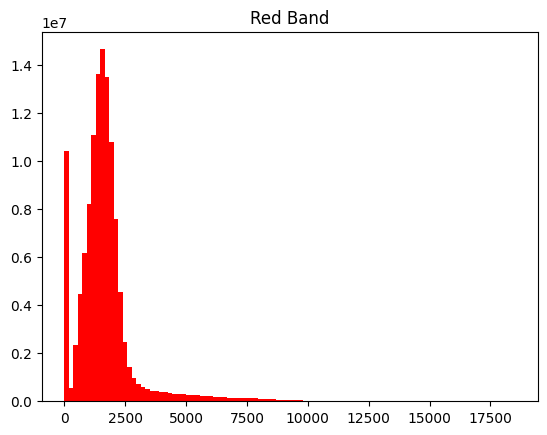

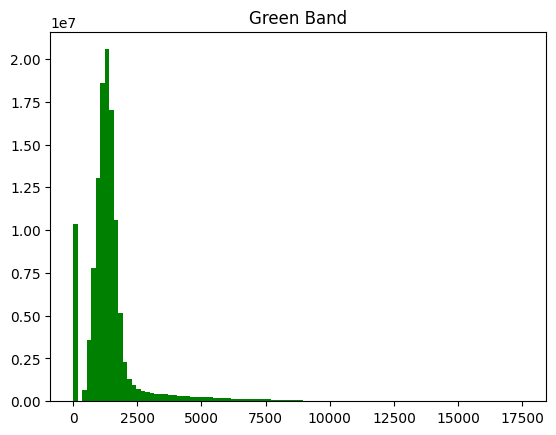

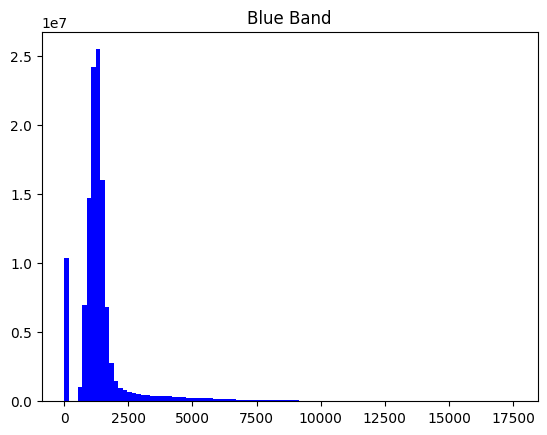

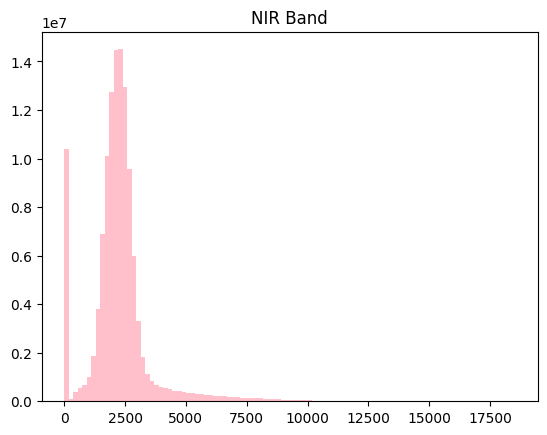

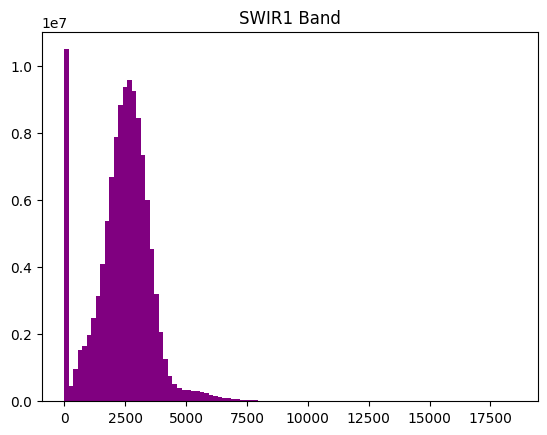

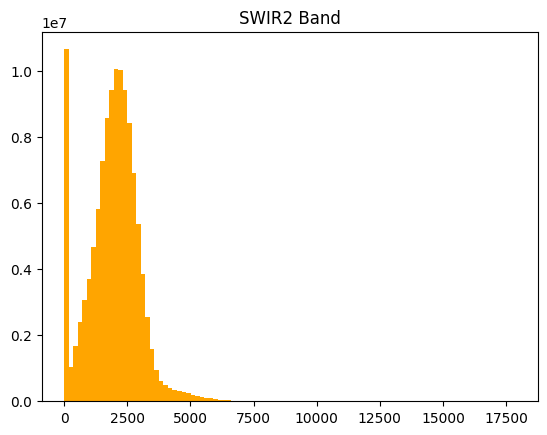

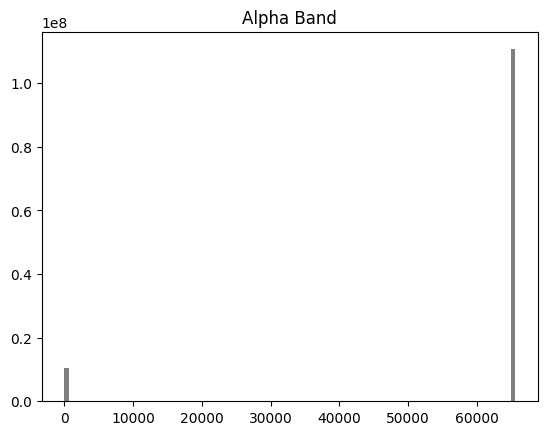

In [ ]:
plot_histogram(fixed_stack)

In [ ]:
plt.close('all')

In [ ]:
# Task 3 Notes
# From this distribution, its clear that all the bands except the alpha band have
# a similar shape in their distribution. All of them are centered around 2500 with
# some very large outliers. However, the alpha band is interesting in that all of the data
# is either very high -> satellite imagery present or very low -> satellite imagery not present.
# I'm predicting that the images contributing to the 0's in the alpha band were those that were
# half cut out.

In [ ]:
# Task 4

In [ ]:
# Function to remove scenes that were half black

def trim_scenes(dataset):
  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()
    alpha_band = arr[6,:,:]

    total_elements = alpha_band.shape[0] * alpha_band.shape[1]

    if np.count_nonzero(alpha_band)/ total_elements < 0.5:
      print(x)
      fixed_stack.remove(x)


In [ ]:
trim_scenes(fixed_stack)

In [ ]:
# Task 4 Notes
# For this portion of the assignment, I chose to cut out all the scenes that were half blank.
# To do this, I looked at the alpha bands and made sure that more than half of the values were non-zero
# I wanted to cut out the scenes that were half blank because I didn't want the min/median/mean composites
# to have blank imagery included in the calculation.

# The scenes that were cut our are:

#/content/s2_santafe/projected_sentinel-2:L1C_2018-01-29.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-02-11.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-02-21.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-04-07.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-04-14.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-06-01.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-06-03.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-08-10.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-10-16.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-12-15.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-12-18.tif
#/content/s2_santafe/projected_sentinel-2:L1C_2018-12-30.tif

In [ ]:
# Task 4 Extra Credit

In [ ]:
def graph_composites(red, green, blue, nir, rgb_title, ngb_title):
  red_scaled = red
  red_min, red_max = find_clip(red)
  np.clip(red, red_min, red_max, out=red_scaled)
  red_int_scaled = (red_scaled - red_scaled.min()) / (red_scaled.max() - red_scaled.min()) * 255


  green_scaled = green
  green_min, green_max = find_clip(green)
  np.clip(green, green_min, green_max, out=green_scaled)
  green_int_scaled = (green_scaled - green_scaled.min()) / (green_scaled.max() - green_scaled.min()) * 255


  blue_scaled = blue
  blue_min, blue_max = find_clip(blue)
  np.clip(blue, blue_min, blue_max, out=blue_scaled)
  blue_int_scaled = (blue_scaled - blue_scaled.min()) / (blue_scaled.max() - blue_scaled.min()) * 255


  nir_scaled = nir
  nir_min, nir_max = find_clip(nir)
  np.clip(nir, nir_min, nir_max, out=nir_scaled)
  nir_int_scaled = (nir_scaled - nir_scaled.min()) / (nir_scaled.max() - nir_scaled.min()) * 255


  rgb = np.stack([red_int_scaled, green_int_scaled, blue_int_scaled], axis=-1)
  ngb = np.stack([nir_int_scaled, red_int_scaled, green_int_scaled], axis=-1)

  # Plotting

  fig = plt.figure(dpi=150)

  ax1 = fig.add_subplot(2,2,1)
  ax1.set_title(rgb_title)
  ax1.imshow(rgb.astype('uint8'))
  ax2 = fig.add_subplot(2,2,2)
  ax2.set_title(ngb_title)
  ax2.imshow(ngb.astype('uint8'))

  ax1.axis('off')
  ax2.axis('off')



In [ ]:
def cloud_mask(dataset):

  cloud_cover1 = []
  cloud_cover2 = []

  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()

    red_band = arr[0,:,:]
    green_band = arr[1,:,:]
    blue_band = arr[2,:,:]
    nir_band = arr[3, :, :]
    swir1_band = arr[4, :, :]
    swir2_band = arr[5,:,:]

    total_pixels = arr.shape[1] * arr.shape[2]

    zero_mask = (red_band == 0) | (green_band == 0) | (blue_band == 0) | (nir_band == 0) | (swir1_band == 0) | (swir2_band == 0)

    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      CI_1 = (np.where(zero_mask, 0, (nir_band + 2*swir1_band) / (blue_band + green_band + red_band)))

    CI_2 = (blue_band + green_band + red_band + nir_band + swir1_band + swir2_band) / 6

    # Hyperparameters

    # T1 is a threshold parameter of the CI1 index in the cloud detection, and
    # is utilized to constrain the similarity of the reflective characteristics
    # of clouds in the visible and infrared bands.
    # The value of T1 is selected from the set of {0.01, 0.1, 1, 10, 100}

    # t2 is a threshold parametr of the CI2 index in the cloud detection, and is
    # utilized to constrain the brightness property of clouds.
    # is an adjusting coefficient, which is generally selected from the set of
    # {1/10, 1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2}.

    T1 = 0.01

    t2 = 1/9

    T2 = np.mean(CI_2) + t2*(np.max(CI_2) - np.mean(CI_2))

    cloud_cover1.append((np.sum(np.abs(CI_1 - 1) < T1)) / total_pixels)

    cloud_cover2.append(np.sum(CI_2 > T2) / total_pixels)

    max_cloud1 = dataset[cloud_cover1.index(max(cloud_cover1))]
    max_cloud2 = dataset[cloud_cover2.index(max(cloud_cover2))]

    CI_1[CI_1>1] = -1
    CI_1[CI_1==0] = 1
    CI_1[CI_1==-1] = 0

    red = np.multiply(red_band, CI_1)
    green = np.multiply(green_band, CI_1)
    blue = np.multiply(blue_band, CI_1)
    nir = np.multiply(nir_band, CI_1)

    graph_composites(red_band - red, green_band - green, blue_band - blue, nir_band - nir,'RGB Cloud Mask', 'Color Infrared Cloud Mask')


  return max_cloud1, max_cloud2, cloud_cover1, cloud_cover2, CI_1, CI_2

In [ ]:
# Extra Credit: Task 4 Notes

# I used the algorithm from this paper to set up the cloud mask:
# https://www.sciencedirect.com/science/article/pii/S0924271618301989#e0015

# Generally speaking, clouds are characterized by a higher reflectance and a
# lower brightness temperature than other land materials. In this paper, a
# unified cloud/shadow detection algorithm based on spectral indices was proposed
# Two algorithms to distinguish clouds are proposed. The first: CI1 is the ratio
# of the sum of the infrared bands and the sum of the visible bands, is utilized
# to measure the similarity of the reflective characteristics in the visible
# bands and the infrared bands. The second: CI2 is the mean of all the related
# spectral bands, and is constructed to describe the brightness property of clouds

# On application of both algorithms: CI1 and CI2 I got two different answers:
# sentinel-2:L1C_2018-11-10.tif and sentinel-2:L1C_2018-03-15.tif
# On visual inspection, they are certainly the two scenes with the most
# clouds from the enitre dataset, and I have been back and forth on which truly
# has the most clouds.



In [ ]:
# Task 5

In [ ]:
def find_scenes(dataset):

  ndvi = []
  ndsi = []
  brightness = []

  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()
    red_band = arr[0,:,:]
    green_band = arr[1,:,:]
    nir_band = arr[3,:,:]
    swir1_band = arr[4,:,:]
    swir2_band = arr[5,:,:]

    zero_mask = (red_band == 0) | (green_band == 0) | (nir_band == 0) | (swir2_band == 0)

    brightness.append(np.sum(arr))

    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)

      ndvi.append(np.mean(np.where(zero_mask, 0, (nir_band - red_band)/ ( nir_band + red_band))))
      ndsi.append(np.mean(np.where(zero_mask, 0, (green_band - swir1_band) / (green_band + swir1_band))))

  max_vegetation = dataset[ndvi.index(max(ndvi))]
  max_snow = dataset[ndsi.index(min(ndsi))]
  max_brightness = dataset[brightness.index(max(brightness))]

  return max_vegetation, max_snow, max_brightness


In [ ]:
max_veg, max_snow, max_bright = find_scenes(fixed_stack)
max_cloud1, max_cloud2, cloud_cover1, cloud_cover2, CI_1, CI_2 = cloud_mask(fixed_stack)

In [ ]:
# Plotting the iages with the cloud mask was interesting, and a lot more difficult than I expected
# I found that with the cloud mask algorithm that I implemented was only okay at actually masking the clouds.
# I found that it masked large puffy clouds (cumulus?) clouds very well, but smaller clouds, or hazy clouds
# were not masked at all.

In [ ]:
print('The scene with the most vegetation is: ' + max_veg.split('projected')[1])
print('The scene with the most snow is: ' + max_snow.split('projected')[1])
print('The scene with the most clouds is: ' + max_cloud1.split('projected')[1] + ' and ' + max_cloud2.split('projected')[1])
print('The scene with the highest overall brightness is: ' + max_bright.split('projected')[1] )

The scene with the most vegetation is: _sentinel-2:L1C_2018-11-03.tif
The scene with the most snow is: _sentinel-2:L1C_2018-12-13.tif
The scene with the most clouds is: _sentinel-2:L1C_2018-11-10.tif and _sentinel-2:L1C_2018-03-15.tif
The scene with the highest overall brightness is: _sentinel-2:L1C_2018-03-15.tif


In [ ]:
# Task 5 Notes

# The scene with the most vegetation can be analyzed with the NDVI.
# NDVI = (NIR - RED) / (NIR + RED)
# NDVI quantifies vegetation by measuring the difference between near-infrared
# (which vegetation strongly reflects) and red light (which vegetation absorbs).
# My algorithm said that the image for 11-03 had the most vegetation, looking at the images, I think this makes sense, and is accurate

# The scene with the most snow can be analyzed with NDSI
# NDSI =(GREEN - SWIR) / (GREEN + SWIR)
# NDSI is a measure of the relative magnitude of the reflectance difference
# between visible (green) and shortwave infrared (SWIR). It controls the
# variance of two bands (one in the near-infrared or short-wave infrared and
# another one in the visible parts of the spectrum).
# I'll be honest, I didn't even know it snowed in New Mexico so I was suprised to see this question
# Nevertheless, the NDSI said that the scene with the most snow is 12-13, and upon closer inspection of the scene I can see that it does make sense and that
# it does in fact snow in New Mexico

# The scene with the most clouds can be analyzed by observing the cloud mask.
# The cloud mask detects on a pixel-wise basis whether or not there are cloud in
# that particular pixel.
# The algorithm I implemented had two cloud index calculations, and when I applied both algorithms I got two different answers: 11-10 and 03-15
# Upon inspection of the scene I can definitively say that those two are the cloudiest scenes, but if I had to pick I would say 11-10 is cloudier
# I'm including both answers because I want to acknowledge that the paper described two ways of measuring clouds: one based on brightness, and the other based on the infrared bands

# The scene with the highest overall brightness can be analyzed by summing the
# total array. From my analysis I saw that the scene with the highest overall
# brightness is also the scene with one of the most clouds in it
# From above, for the cloud index algorithm that depicted whether the pixel had clouds in it depending on brightness, the answer was 03-15, therefore it makes sense that the
# brightest scene would be 03-15

In [ ]:
# Task 6

In [ ]:
def mean_composite(dataset):
  red_stacked = []
  green_stacked = []
  blue_stacked = []
  nir_stacked = []

  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()

    red = arr[0,:,:]
    green = arr[1,:,:]
    blue = arr[2,:,:]
    nir = arr[3,:,:]

    red_stacked.append(red)
    green_stacked.append(green)
    blue_stacked.append(blue)
    nir_stacked.append(nir)

  red_stacked_arrays = np.stack(red_stacked, axis=2)
  green_stacked_arrays = np.stack(green_stacked, axis=2)
  blue_stacked_arrays = np.stack(blue_stacked, axis=2)
  nir_stacked_arrays = np.stack(nir_stacked, axis=2)

  red_mean = np.mean(red_stacked_arrays, axis=2)
  green_mean = np.mean(green_stacked_arrays, axis=2)
  blue_mean = np.mean(blue_stacked_arrays, axis=2)
  nir_mean = np.mean(nir_stacked_arrays, axis=2)

  graph_composites(red_mean, green_mean, blue_mean, nir_mean,'RGB Mean Composite', 'Color Infrared Mean Composite')

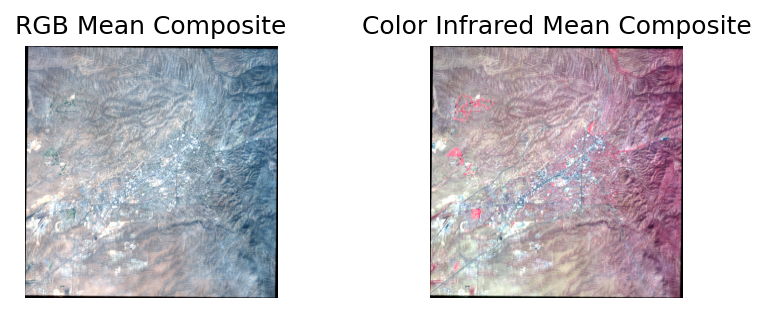

In [ ]:
mean_composite(fixed_stack)

In [ ]:
def median_composite(dataset):
  red_stacked = []
  green_stacked = []
  blue_stacked = []
  nir_stacked = []

  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()

    red = arr[0,:,:]
    green = arr[1,:,:]
    blue = arr[2,:,:]
    nir = arr[3,:,:]

    red_stacked.append(red)
    green_stacked.append(green)
    blue_stacked.append(blue)
    nir_stacked.append(nir)

  red_stacked_arrays = np.stack(red_stacked, axis=2)
  green_stacked_arrays = np.stack(green_stacked, axis=2)
  blue_stacked_arrays = np.stack(blue_stacked, axis=2)
  nir_stacked_arrays = np.stack(nir_stacked, axis=2)

  red_med = np.median(red_stacked_arrays, axis=2)
  green_med = np.median(green_stacked_arrays, axis=2)
  blue_med = np.median(blue_stacked_arrays, axis=2)
  nir_med = np.median(nir_stacked_arrays, axis=2)

  graph_composites(red_med, green_med, blue_med, nir_med,'RGB Median Composite', 'Color Infrared Median Composite')

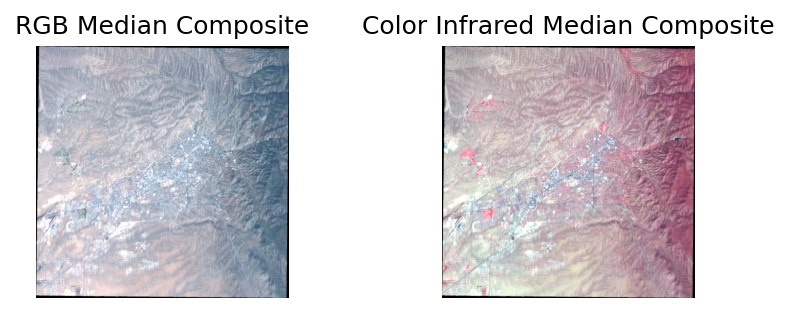

In [ ]:
median_composite(fixed_stack)

In [ ]:
def min_composite(dataset):
  src1 = rasterio.open(dataset[0])
  arr1 = src1.read()
  red_min = arr1[0,:,:]
  green_min = arr1[1,:,:]
  blue_min = arr1[2,:,:]
  nir_min = arr1[3,:,:]

  for x in dataset[1:]:
    src = rasterio.open(x)
    arr = src.read()

    red = arr[0,:,:]
    green = arr[1,:,:]
    blue = arr[2,:,:]
    nir = arr[3,:,:]

    red_min = np.minimum(red_min, red)
    green_min = np.minimum(green_min, green)
    blue_min = np.minimum(blue_min, blue)
    nir_min = np.minimum(nir_min, nir)

  graph_composites(red_min, green_min, blue_min, nir_min,'RGB Minimum Composite', 'Color Infrared Minimum Composite')

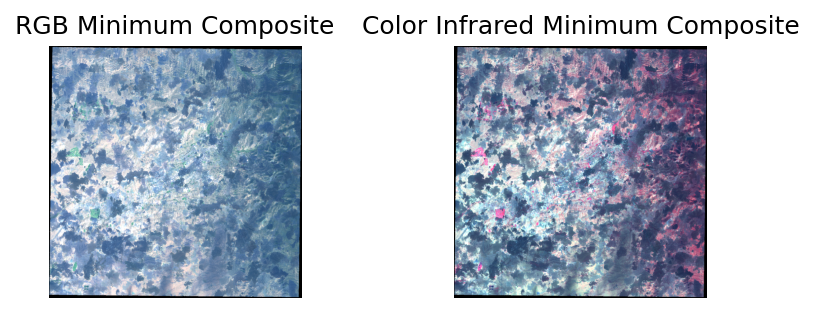

In [ ]:
min_composite(fixed_stack)

In [ ]:
def max_composite(dataset):
  src1 = rasterio.open(dataset[0])
  arr1 = src1.read()
  red_max = arr1[0,:,:]
  green_max = arr1[1,:,:]
  blue_max = arr1[2,:,:]
  nir_max = arr1[3,:,:]

  for x in dataset[1:]:
    src = rasterio.open(x)
    arr = src.read()

    red = arr[0,:,:]
    green = arr[1,:,:]
    blue = arr[2,:,:]
    nir = arr[3,:,:]

    red_max = np.maximum(red_max, red)
    green_max = np.maximum(green_max, green)
    blue_max = np.maximum(blue_max, blue)
    nir_max = np.maximum(nir_max, nir)

  graph_composites(red_max, green_max, blue_max, nir_max,'RGB Maximum Composite', 'Color Infrared Maximum Composite')

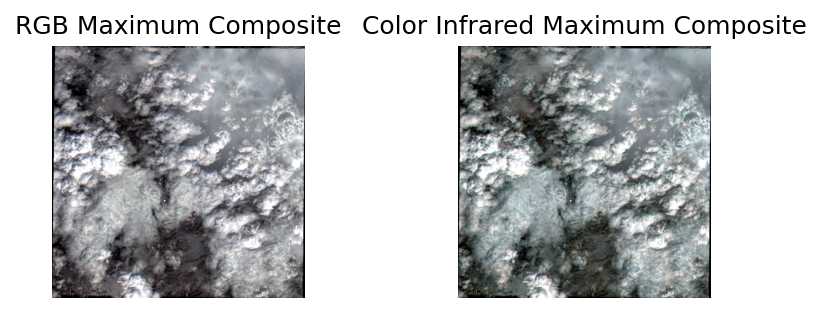

In [ ]:
max_composite(fixed_stack)

In [ ]:
def find_greenest(dataset):
  src1 = rasterio.open(dataset[0])
  arr1 = src1.read()
  red1 = arr1[0,:,:]
  green1 = arr1[1,:,:]
  blue1 = arr1[2,:,:]
  nir1 = arr1[3,:,:]

  zero_mask = (red1 == 0) | (green1 == 0) | (blue1 == 0)

  with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

    ndvi1 = (np.where(zero_mask, 0, (nir1 - red1) / ( nir1 + red1)))


  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()
    red_band = arr[0,:,:]
    green_band = arr[1,:,:]
    blue_band = arr[2,:,:]
    nir_band = arr[3,:,:]

    zero_mask = (red_band == 0) | (green_band == 0) | (nir_band == 0)

    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)

      ndvi_set = (np.where(zero_mask, 0, (nir_band - red_band)/ ( nir_band + red_band)))

    ndvi1 = np.maximum(ndvi1, ndvi_set)

    max_ndvi_indices = np.where(ndvi1 == ndvi_set)

    red1[max_ndvi_indices] = red_band[max_ndvi_indices]
    green1[max_ndvi_indices] = green_band[max_ndvi_indices]
    blue1[max_ndvi_indices] = blue_band[max_ndvi_indices]
    nir1[max_ndvi_indices] = nir_band[max_ndvi_indices]


  graph_composites(red1, green1, blue1, nir1,'RGB Greenest Composite', 'Color Infrared Greenest Composite')

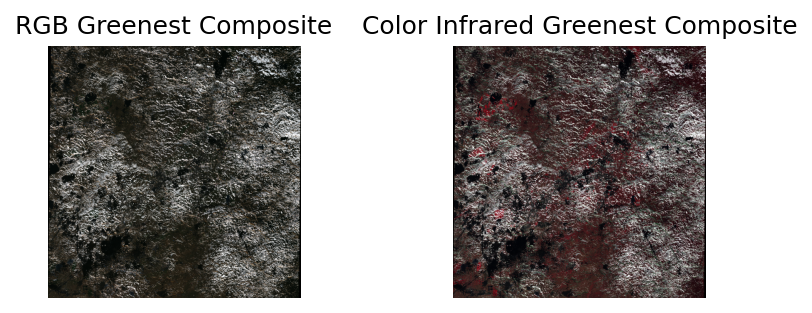

In [ ]:
find_greenest(fixed_stack)

In [ ]:
plt.close('all')

In [ ]:
# Task 6 Notes

# For the mean and median, the images were generally what I expected. Most of the original images looked like the mean, and I'm not surprised with how the mean looks
# I do think it's interesting that there aren't clouds visible. However, there is some blurring, which I think may be clouds.
# The maximum composite image was also generally what I expected, it seems to be a composition of all the clouds which makes sense because clouds have the highest pixel value
# I thought the minimum composite image and the greenest composite iage was interesting. Honestly, I'm not entirely sure what I am looking at.
# The greenest pixel iage is certainly very green, but when I compare it to the image that was identified as the scene with the most vegetation, it looks
# slightly the same. I think its interesting to see how clouds were incorporated into the composite image.

In [ ]:
# Extra Credit: Task 6

In [ ]:
def greenest_pixel85(dataset):
  src1 = rasterio.open(dataset[0])
  arr1 = src1.read()
  red1 = arr1[0,:,:]
  green1 = arr1[1,:,:]
  blue1 = arr1[2,:,:]
  nir1 = arr1[3,:,:]

  zero_mask = (red1 == 0) | (green1 == 0) | (blue1 == 0)

  with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

    ndvi1 = (np.where(zero_mask, 0, (nir1 - red1) / ( nir1 + red1)))
    ndvi1 = np.percentile(ndvi1, 85)


  for x in dataset:
    src = rasterio.open(x)
    arr = src.read()
    red_band = arr[0,:,:]
    green_band = arr[1,:,:]
    blue_band = arr[2,:,:]
    nir_band = arr[3,:,:]

    zero_mask = (red_band == 0) | (green_band == 0) | (nir_band == 0)

    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)

      ndvi_set = (np.where(zero_mask, 0, (nir_band - red_band)/ ( nir_band + red_band)))
      ndvi1_set = np.percentile(ndvi_set, 85)

    ndvi1 = np.maximum(ndvi1, ndvi1_set)

    max_ndvi_indices = np.where(ndvi1 == ndvi_set)

    red1[max_ndvi_indices] = red_band[max_ndvi_indices]
    green1[max_ndvi_indices] = green_band[max_ndvi_indices]
    blue1[max_ndvi_indices] = blue_band[max_ndvi_indices]
    nir1[max_ndvi_indices] = nir_band[max_ndvi_indices]


  graph_composites(red1, green1, blue1, nir1,'RGB 85% Greenest', 'Color Infrared 85% Greenest')


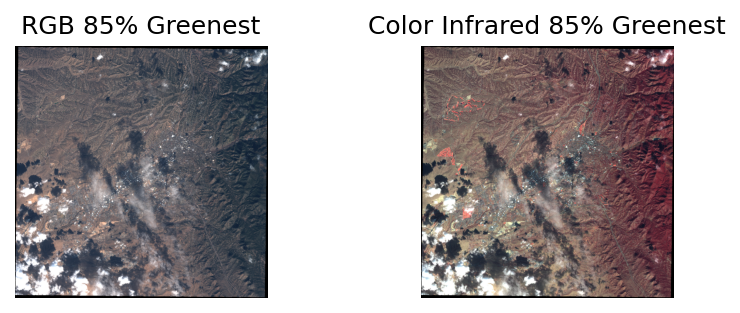

In [ ]:
greenest_pixel85(fixed_stack)

In [ ]:
def find_min25(dataset):
  src1 = rasterio.open(dataset[0])
  arr1 = src1.read()
  red_min = arr1[0,:,:]
  green_min = arr1[1,:,:]
  blue_min = arr1[2,:,:]
  nir_min = arr1[3,:,:]

  for x in dataset[1:]:
    src = rasterio.open(x)
    arr = src.read()

    red = arr[0,:,:]
    red = np.percentile(red, 25)
    green = arr[1,:,:]
    green = np.percentile(green, 25)
    blue = arr[2,:,:]
    blue = np.percentile(blue, 25)
    nir = arr[3,:,:]
    nir = np.percentile(nir, 25)

    red_min = np.minimum(red_min, red)
    green_min = np.minimum(green_min, green)
    blue_min = np.minimum(blue_min, blue)
    nir_min = np.minimum(nir_min, nir)

  graph_composites(red_min, green_min, blue_min, nir_min,'RGB 25% Minimum', 'Color Infrared 25% Minimum')


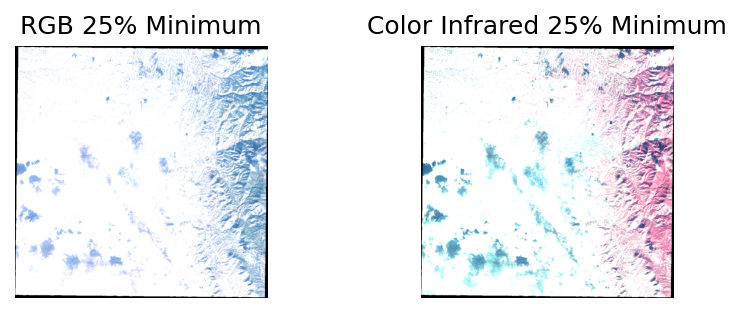

In [ ]:
find_min25(fixed_stack)